# Task 1: Web scraping and analysis

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [33]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

for i in range (1, pages + 1):
  print(f"Scraping page {i}")

  # Create URL to collect links from paginated data
  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

  # Collect HTML data from this page
  response = requests.get(url)

  # Parse content
  content = response.content
  parsed_content = BeautifulSoup(content, 'html.parser')
  for para in parsed_content.find_all("div", {"class": "text_content"}):
    reviews.append(para.get_text())

  print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [34]:
df = pd.DataFrame()
df['reviews'] = reviews
df.head()

,reviews
0,"Not Verified | On March 1st, I flew from Ber..."
1,Not Verified | The WORST customer experience! ...
2,Not Verified | Had to cancel my flight month...
3,✅ Trip Verified | Flight cancelled with no rea...
4,✅ Trip Verified | This is a route I fly regula...


In [35]:
df.shape

(2000, 1)

In [36]:
# Split 'Verified' status into a new column 'sentiment' and the review text
df[['status', 'review_text']] = df['reviews'].str.split('|', expand=True)

# Drop rows where review_text is NaN
df = df.dropna(subset=['review_text'])

# Keep only the review_text column
df = df[['review_text']]

df.head()


,review_text
0,"On March 1st, I flew from Berlin to São Pau..."
1,The WORST customer experience! British Airway...
2,Had to cancel my flight months in advance d...
3,Flight cancelled with no reason given less th...
4,This is a route I fly regularly. Used first c...


In [37]:
df.to_csv("BA_reviews.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [39]:
df.isnull().sum()

review_text    0
dtype: int64

In [40]:
df.duplicated().sum()

0

In [41]:
#@title Text Cleaning
import re

def clean(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Strip leading/trailing whitespace
    text = text.strip()
    return text

# Apply the clean function to the review_text column
df['Cleaned Reviews'] = df['review_text'].apply(clean)
df.head()


,review_text,Cleaned Reviews
0,"On March 1st, I flew from Berlin to São Pau...",on march 1st i flew from berlin to são paulo w...
1,The WORST customer experience! British Airway...,the worst customer experience british airways ...
2,Had to cancel my flight months in advance d...,had to cancel my flight months in advance due ...
3,Flight cancelled with no reason given less th...,flight cancelled with no reason given less tha...
4,This is a route I fly regularly. Used first c...,this is a route i fly regularly used first cla...


In [42]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import time
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [43]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
  tags = pos_tag(word_tokenize(text))
  l = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      l.append(tuple([word, pos_dict.get(tag[0])]))
  return l

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,review_text,Cleaned Reviews,POS tagged
0,"On March 1st, I flew from Berlin to São Pau...",on march 1st i flew from berlin to são paulo w...,"[(march, n), (1st, None), (flew, v), (berlin, ..."
1,The WORST customer experience! British Airway...,the worst customer experience british airways ...,"[(worst, a), (customer, n), (experience, n), (..."
2,Had to cancel my flight months in advance d...,had to cancel my flight months in advance due ...,"[(cancel, v), (flight, n), (months, n), (advan..."
3,Flight cancelled with no reason given less th...,flight cancelled with no reason given less tha...,"[(flight, n), (cancelled, v), (reason, n), (gi..."
4,This is a route I fly regularly. Used first c...,this is a route i fly regularly used first cla...,"[(route, n), (fly, v), (regularly, r), (used, ..."


In [44]:
#@title Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemmatized'] = df['POS tagged'].apply(lemmatize)
df.head()

,review_text,Cleaned Reviews,POS tagged,Lemmatized
0,"On March 1st, I flew from Berlin to São Pau...",on march 1st i flew from berlin to são paulo w...,"[(march, n), (1st, None), (flew, v), (berlin, ...",march 1st fly berlin são paulo ba encounter ...
1,The WORST customer experience! British Airway...,the worst customer experience british airways ...,"[(worst, a), (customer, n), (experience, n), (...",bad customer experience british airway ba ef...
2,Had to cancel my flight months in advance d...,had to cancel my flight months in advance due ...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...
3,Flight cancelled with no reason given less th...,flight cancelled with no reason given less tha...,"[(flight, n), (cancelled, v), (reason, n), (gi...",flight cancel reason give less 24 h departur...
4,This is a route I fly regularly. Used first c...,this is a route i fly regularly used first cla...,"[(route, n), (fly, v), (regularly, r), (used, ...",route fly regularly use first class security...


## Sentiment Analysis

In [45]:
!pip install vaderSentiment

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def sentimentanalysis(review):
  vs = analyzer.polarity_scores(review)
  return vs['compound']

df['Sentiment'] = df['Lemmatized'].apply(sentimentanalysis)

def vader_analysis(compound):
  if compound >= 0.05:
    return 'Positive'
  elif compound < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,review_text,Cleaned Reviews,POS tagged,Lemmatized,Sentiment,Sentiment Analysis
0,"On March 1st, I flew from Berlin to São Pau...",on march 1st i flew from berlin to são paulo w...,"[(march, n), (1st, None), (flew, v), (berlin, ...",march 1st fly berlin são paulo ba encounter ...,-0.9183,Negative
1,The WORST customer experience! British Airway...,the worst customer experience british airways ...,"[(worst, a), (customer, n), (experience, n), (...",bad customer experience british airway ba ef...,-0.7692,Negative
2,Had to cancel my flight months in advance d...,had to cancel my flight months in advance due ...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...,-0.4939,Negative
3,Flight cancelled with no reason given less th...,flight cancelled with no reason given less tha...,"[(flight, n), (cancelled, v), (reason, n), (gi...",flight cancel reason give less 24 h departur...,-0.9698,Negative
4,This is a route I fly regularly. Used first c...,this is a route i fly regularly used first cla...,"[(route, n), (fly, v), (regularly, r), (used, ...",route fly regularly use first class security...,0.9744,Positive


In [47]:
df = df[['review_text', 'Lemmatized' ,'Sentiment' ,'Sentiment Analysis']]
df.head()

,review_text,Lemmatized,Sentiment,Sentiment Analysis
0,"On March 1st, I flew from Berlin to São Pau...",march 1st fly berlin são paulo ba encounter ...,-0.9183,Negative
1,The WORST customer experience! British Airway...,bad customer experience british airway ba ef...,-0.7692,Negative
2,Had to cancel my flight months in advance d...,cancel flight month advance due change sched...,-0.4939,Negative
3,Flight cancelled with no reason given less th...,flight cancel reason give less 24 h departur...,-0.9698,Negative
4,This is a route I fly regularly. Used first c...,route fly regularly use first class security...,0.9744,Positive


In [48]:
sentiment_counts = df['Sentiment Analysis'].value_counts()
sentiment_counts

Sentiment Analysis
Positive    1202
Negative     778
Neutral       19
Name: count, dtype: int64

### Plotting

(-1.0999987098008557,
 1.0999932502653924,
 -1.0999989320551702,
 1.0999999491454844)

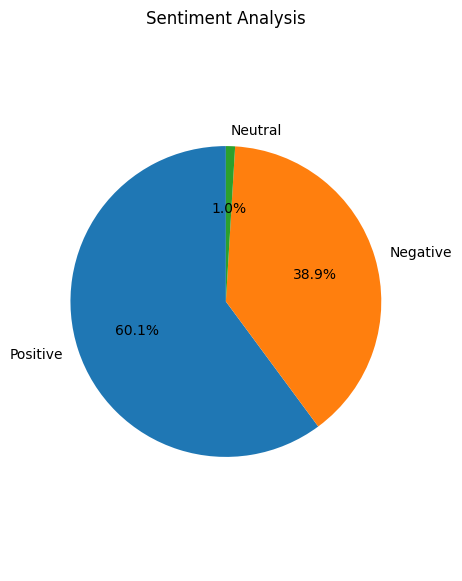

In [49]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 2)
plt.title("Sentiment Analysis")
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

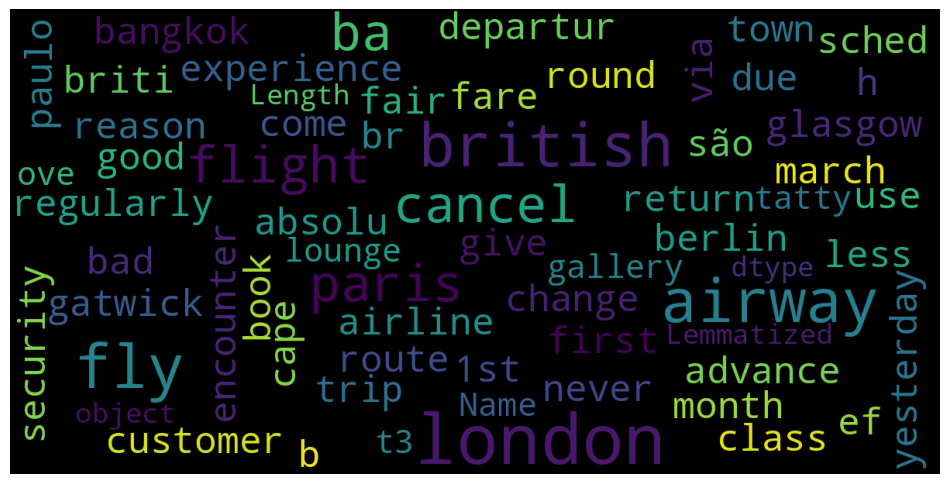

In [51]:
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemmatized)